# Import Packages

In [1]:
# Import packages
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Load AFM data with `np.loadtxt`

In [2]:
# Import AFM data
afm_data = np.loadtxt('data_raw/afm.txt')

# Inspect AFM data - 256 x 256 array of points

In [3]:
# Print some of the AFM data
print(afm_data[0:5])

[[4.8379e-08 4.7485e-08 4.6752e-08 ... 6.0293e-08 5.7804e-08 5.4779e-08]
 [5.0034e-08 4.9139e-08 4.7975e-08 ... 5.7221e-08 5.4744e-08 5.1316e-08]
 [5.2966e-08 5.2099e-08 5.1076e-08 ... 5.4061e-08 5.0873e-08 4.7128e-08]
 [5.7146e-08 5.6070e-08 5.4871e-08 ... 5.1104e-08 4.6898e-08 4.1961e-08]
 [6.2167e-08 6.0804e-08 5.9588e-08 ... 4.7038e-08 4.2115e-08 3.7258e-08]]


# Convert data from meters to nanometers (1 m = 10<sup>9</sup> nm)

In [4]:
# Convert data to nanometers (nm)
afm_data *= (10**9)

# Edit overall plot parameters

In [5]:
# Edit overall plot parameters

# Font parameters
mpl.rcParams['font.size'] = 18

# Edit axes parameters
mpl.rcParams['axes.linewidth'] = 2

# Tick properties
mpl.rcParams['xtick.major.size'] = 10
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['xtick.direction'] = 'out'
mpl.rcParams['ytick.major.size'] = 10
mpl.rcParams['ytick.major.width'] = 2
mpl.rcParams['ytick.direction'] = 'out'

# Create heatmap using `plt.imshow`

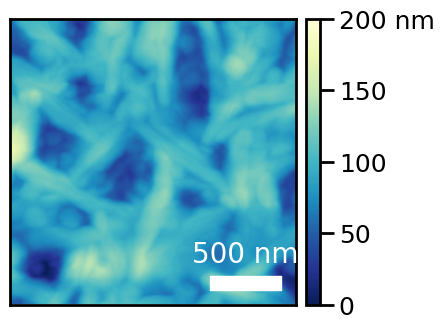

In [6]:
# Create figure and add axis
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)

# Remove x and y ticks
ax.xaxis.set_tick_params(size=0)
ax.yaxis.set_tick_params(size=0)
ax.set_xticks([])
ax.set_yticks([])

# Show AFM image
img = ax.imshow(afm_data, origin='lower', cmap='YlGnBu_r', extent=(0, 2, 0, 2), vmin=0, vmax=200)

# Create scale bar
ax.fill_between(x=[1.4, 1.9], y1=[0.1, 0.1], y2=[0.2, 0.2], color='white')
ax.text(x=1.65, y=0.25, s='500 nm', va='bottom', ha='center', color='white', size=20)

# Add colorbar
cbar_ax = make_axes_locatable(ax).append_axes(position='right', size='5%', pad=0.1)
cbar = fig.colorbar(mappable=img, cax=cbar_ax)
cbar.set_ticks([0, 50, 100, 150, 200])
cbar.set_ticklabels(['0', '50', '100', '150', '200 nm'])

# Save and show figure
#plt.savefig('afm_heatmap.png', dpi=100, bbox_inches='tight')
plt.show()

# Create contour plot using `plt.contour`

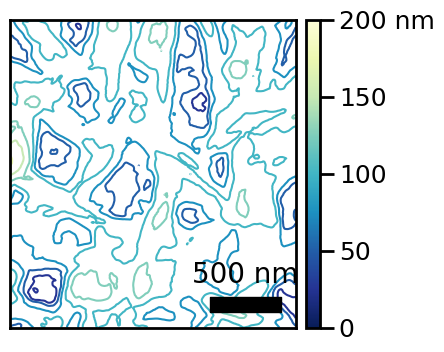

In [7]:
# Create figure and add axis
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)

# Remove x and y ticks
ax.xaxis.set_tick_params(size=0)
ax.yaxis.set_tick_params(size=0)
ax.set_xticks([])
ax.set_yticks([])

# Show AFM contour plot
ax.contour(afm_data, extent=(0, 2, 0, 2), cmap='YlGnBu_r', vmin=0, vmax=200, zorder=1)

# Create scale bar
ax.fill_between(x=[1.4, 1.9], y1=[0.1, 0.1], y2=[0.2, 0.2], color='black')
ax.text(1.65, 0.25, '500 nm', va='bottom', ha='center', color='black', size=20)

# Add colorbar
cbar_ax = make_axes_locatable(ax).append_axes('right', size='5%', pad=0.1)
cbar = fig.colorbar(img, cax=cbar_ax)
cbar.set_ticks([0, 50, 100, 150, 200])
cbar.set_ticklabels(['0', '50', '100', '150', '200 nm'])

# Save and show figure
#plt.savefig('afm_contour.png', dpi=100, bbox_inches='tight')
plt.show()

# Create filled contour plot with `plt.contourf`

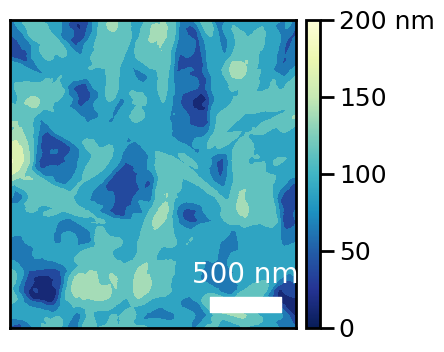

In [8]:
# Create figure and add axis
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)

# Remove x and y ticks
ax.xaxis.set_tick_params(size=0)
ax.yaxis.set_tick_params(size=0)
ax.set_xticks([])
ax.set_yticks([])

# Show AFM filled contour plot
ax.contourf(afm_data, extent=(0, 2, 0, 2), cmap='YlGnBu_r', vmin=0, vmax=200)

# Create scale bar
ax.fill_between(x=[1.4, 1.9], y1=[0.1, 0.1], y2=[0.2, 0.2], color='white')
ax.text(1.65, 0.25, '500 nm', va='bottom', ha='center', color='white', size=20)

# Add colorbar
cbar_ax = make_axes_locatable(ax).append_axes('right', size='5%', pad=0.1)
cbar = fig.colorbar(img, ax=ax, cax=cbar_ax)
cbar.set_ticks([0, 50, 100, 150, 200])
cbar.set_ticklabels(['0', '50', '100', '150', '200 nm'])

# Save and show figure
#plt.savefig('afm_contourf.png', dpi=100, bbox_inches='tight')
plt.show()

# Create 3D plot with `Axes3D`

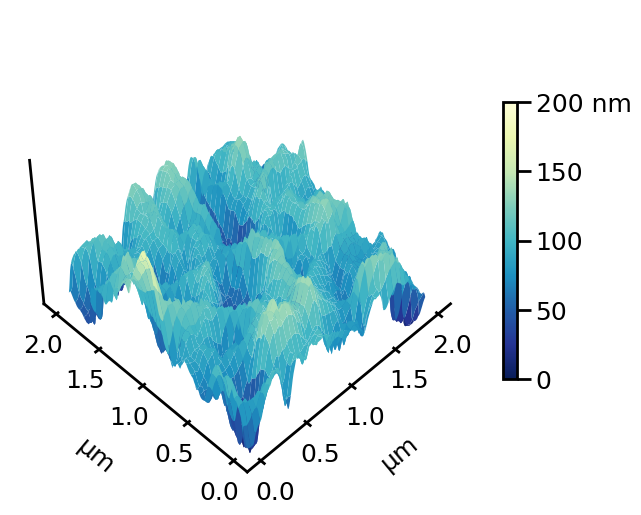

In [10]:
# Create figure and add axis
fig = plt.figure(figsize=(8,6))
ax = plt.subplot(111, projection='3d')

# Remove gray panes and axis grid
ax.xaxis.pane.fill = False
ax.xaxis.pane.set_edgecolor('white')
ax.yaxis.pane.fill = False
ax.yaxis.pane.set_edgecolor('white')
ax.zaxis.pane.fill = False
ax.zaxis.pane.set_edgecolor('white')
ax.grid(False)

# Remove z-axis
ax.set_zticks([])

# Create meshgrid
X, Y = np.meshgrid(np.linspace(0, 2, len(afm_data)), np.linspace(0, 2, len(afm_data)))

# Plot surface
plot = ax.plot_surface(X=X, Y=Y, Z=afm_data, cmap='YlGnBu_r', vmin=0, vmax=200)

# Adjust plot view
ax.view_init(elev=50, azim=225)
ax.dist=11

# Add colorbar
cbar = fig.colorbar(plot, ax=ax, shrink=0.6)
cbar.set_ticks([0, 50, 100, 150, 200])
cbar.set_ticklabels(['0', '50', '100', '150', '200 nm'])

# Set tick marks
ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(0.5))
ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.5))

# Set axis labels
ax.set_xlabel(r'$\mathregular{\mu}$m', labelpad=20)
ax.set_ylabel(r'$\mathregular{\mu}$m', labelpad=20)

# Set z-limit
ax.set_zlim(50, 200)

# Save and show figure
#plt.savefig('afm_3d_plot.png', dpi=100, bbox_inches='tight')
plt.show()